## Ch 2 Notes ##

* Function-space perspective and weight-space perspective

### 2.1 Weight-Space Perspective Notes ###

* First discuss bayesian treatment of linear model
* LMs may be enhanced by projecting inputs into high-dim feature-space & applying linear model there
* Implicit computation in high dimensional space can sometimes be done via a "kernel trick"
    * can be useful when dimensionality of fs is large wrt number of samples
* **design matrix** D = (X,y) where X is a block of d column vectors, where d is the dimension

#### 2.1.1 Standard Linear Model####

* likelihood of data, under assumption generated by LM with additive iid gaussian random noise is, by iid noise assumption, product of likelihoods of data points
* likelihood of each data point is gaussian, because the likelihood fn has same form as pdf
* since product of gaussians is gaussian, the likelihood fn of data is gaussian. Turns out as $N(X^T\bf{w},\sigma^2_n I)$


Checking $\sum_{i=1}^{n}(y_i - \textbf{x}_i^T \textbf{w})^2 = |\textbf{y} - X^T\textbf{w}|^2$ ...

... $(y_1 - \textbf{x}_1^T \textbf{w})^2 + (y_2 - \textbf{x}_2^T \textbf{w})^2 = (y_1 - x_1w_1)^2 + (y_2 - x_2w_2)^2$
$ = \sqrt{ \text{sum of components of } \textbf{y} - X^T\textbf{w}}^2$

* for now assume zero mean normal prior on weights w/ covar matrix $\Sigma_p$
* computing posterior distribution over the weights yields

$p(\textbf{w}|X,\textbf{y}) \sim N(\bar{w} = \frac{1}{\sigma_n^2}A^{-1}X\textbf{y}, A^{-1}) \text{ where } A = \sigma_n^{-2}XX^T + \Sigma_p^{-1}$

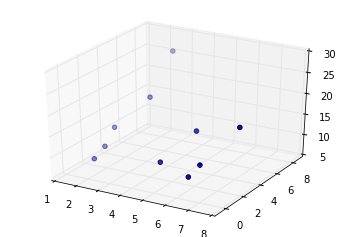

In [106]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##############################################################################
# Here we'll fit and examine a linear model from the bayesian perspective as #
# discussed above                                                            #
##############################################################################

# Define a noisy linear function
def noisy_linear_function(x,sigma):
    '''Noisy linear function on column vector or matrix of column vectors x'''
    n_obs = x.shape[1]
    
    beta = np.array([[5, 0.9, 2.3]])  # Following b[0] = intercept convention
    ones = np.ones([1, n_obs])
    aug  = np.concatenate((ones, x), axis=0)
      
    return np.dot(beta,aug) + np.random.randn(1,n_obs)* sigma

# Create a random set of input variables matrix
# with n observations
n_obs = 10
n_dim = 2
sigma = 1

x_vals = np.random.rand(n_dim,n_obs) * 8
y_vals = noisy_linear_function(x_vals,sigma)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

plot = ax.scatter(x_vals[0,:],x_vals[1,:],y_vals)
